# 6 Dec 2022 - Modeling the Ideal Gas

As we developed from [lecture](https://github.com/dannycab/phy415msu/blob/main/MMIPbook/assets/pdfs/notes/Notes_4_Markov_Chain.pdf), we can sample the Boltzmann distribution by constructing a sample of it through a Markov Chain and computing the value of the quantity of interest and adding it up.

$$\sum_{chain} X_i \approx \langle X \rangle$$

## One Dimensional Gas

We will model an ideal gas, but let's start with a one-dimensional gas made of a bunch of particles in infinite square wells. The energy spectrum for a particle of mass $m$ in an infinite square well of length $L$ is given by:

$$E(n) = \dfrac{\pi^2 \hbar^2}{2mL^2}n^2$$

We can simplify things by choosing $\hbar$, $\pi$, $L$, and $m$ = 1. So that our energy is more simply written as:

$$E(n) = \dfrac{n^2}{2}$$

Our analysis relies on computing the change in energy in making one quantum step $n \pm 1$ and determining if we keep the step or not based on the thermodynamic probability:

$$P = \exp(-\dfrac{\Delta E}{kT})$$

We take $k=1$, so that:

$$P = e^{-\Delta E/T}$$

The change in energy as a result of moving the state up or down is given by:

$$\Delta E_{down} = E(n-1) - E(n) = \dfrac{1}{2}\left((n-1)^2-n^2\right) = \dfrac{-2n+1}{2}$$

$$\Delta E_{up} = E(n+1) - E(n) = \dfrac{1}{2}\left((n+1)^2-n^2\right) = \dfrac{2n+1}{2}$$


## Implementation

Below is the code that develops a model of a one dimensional gas. It is annotated. Review the code and make note of each piece of the algorithm.

**Complete the following**

1. Run the simulation for a variety of temperatures. What do you notice?
2. Run the simulation for the same temperature and establish the average energy and uncertainty. Compare to the expected value.
3. Plot the histogram of final states. How does this look like a good sampling distribution?

In [1]:
import random as random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
temperature = 10
numberOfAtoms = 1000
simulationSteps = 500000

quantumNumberArray = np.ones([numberOfAtoms,1], int)

energyAtEachStep = np.zeros([simulationSteps,1], float)

## Each atom starts in n=1 and
## Contributes 1/2 unit of energy (hbar, pi, m, L = 1)
E = numberOfAtoms/2

## Monte Carlo Loop
for step in range(simulationSteps):
    
    # Choose atom and the move
    ithAtom = random.randrange(numberOfAtoms)
    
    # Randomly select the next energy state +1 or -1
    if random.random() < 0.5:    
        
        changeInState = 1
        changeInEnergy = (0.5)*(2*quantumNumberArray[ithAtom]+1)
    else:
        
        changeInState = -1
        changeInEnergy = (0.5)*(-2*quantumNumberArray[ithAtom]+1)
        
    # Decide to accept with thermodynamic probability
    if quantumNumberArray[ithAtom] > 1 or changeInState == 1:
        
        thermodynamicProbability = np.exp(-changeInEnergy/temperature)
        
        if random.random() < thermodynamicProbability:
            
            quantumNumberArray[ithAtom] += changeInState
            E += changeInEnergy
    
    energyAtEachStep[step] = E

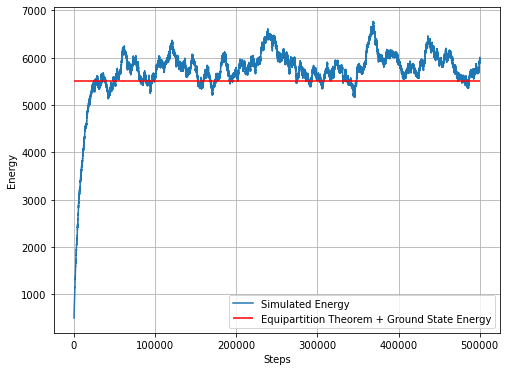

In [3]:
plt.figure(figsize=(8,6))
plt.plot(energyAtEachStep, label = 'Simulated Energy')
plt.hlines(numberOfAtoms*temperature/2+numberOfAtoms/2, 0, simulationSteps, 'r', label='Equipartition Theorem + Ground State Energy')

plt.ylabel('Energy')
plt.xlabel('Steps')

plt.grid()
plt.legend()

## The Ideal Gas

The code above can be used for an ideal gas. There are some changes you have to make because an ideal gas in three dimensions has an energy spectrum like this:

$$E(n_x,n_y,n_z) = \dfrac{\pi^2\hbar^2}{2mL^2}\left(n_x^2+n_y^2+n_z^2\right)$$

**Do this**

1. Using the same approach (changing just one quantum number), find the value for $\Delta E$ in general.
2. Sketch out how the code will need to change to accommodate three dimensions (Discuss with each other and Danny)
3. Implement those changes to calculate the energy of a 3D ideal gas.

In [4]:
## your code here